In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import problem_description
%run problem_description.py  # my problem specs
import data_processing
%run data_processing.py   # data collection

# Validation Study
This analysis was performed on the Electronic Drug Delivery System (EDDS) with the following geometry, boundary conditions, and solver specifications. 

#### Operating Conditions
Boundary Conditions
- Inlet velocity: Low Inlet Condition (samples are generated for this!)
- Outlet Pressure: 101.33 [kPa]
- Nonslip Walls

Solver Tolerance
- Residual Target: 1e-05 

System State
- Steady State

Fluid Type
- Air at room temperature (incompressible fluid)

#### System Response Quantity (SRQ)
Two SRQ's were considered: (1) Maximum velocity at 1mm above the mouthpiece and (2) Average velocity at 1mm above the mouthpiece. In order to compute these quantities, data points were collected along the diameter at 1 mm above the mouthpiece. 

#### Sampling 
To generate simulation samples, the inlet volumetric flow rate (VFR) was experimentally measured in three replicate experiments. The obtained inlet velocities were derived from the VFR and propogated through the model generating three sample SRQ's. The following are the derrived inlet velocities:

Inlet Velocity by Sample

- Sample 1: 0.63000 [m/s]
- Sample 2: 0.63329 [m/s]
- Sample 3: 0.06420 [m/s]

The experiments were replicated to also generate three sample SRQ's.  

#### Validation Metric
To compare the validation experiment and the computational model the SRQ's were compared using a deterministic difference in means. 

In [2]:
print('GEOMETRY SPECIFICATIONS \n',geom_db,'\n',coil10)

GEOMETRY SPECIFICATIONS 
         label  Diameter[mm]  Length[mm]  Thickness[mm]
0  Mouthpiece          8.02      13.960           0.13
1        Pipe          4.54      27.955           0.15
2    Atomizer          4.54       7.500           0.15
3  Inlet Pipe          4.54       2.170           0.15 
 {'Coil_qty': 10, 'Coil_Diameter': 0.3, 'Coil_Spacing': 0.5}


## Results - Qualitative Comparison
For this analysis the sampling for both the experiments and the simulation were used to generate plots with the mean and one standard deviation, which can be seen in the following plot. 

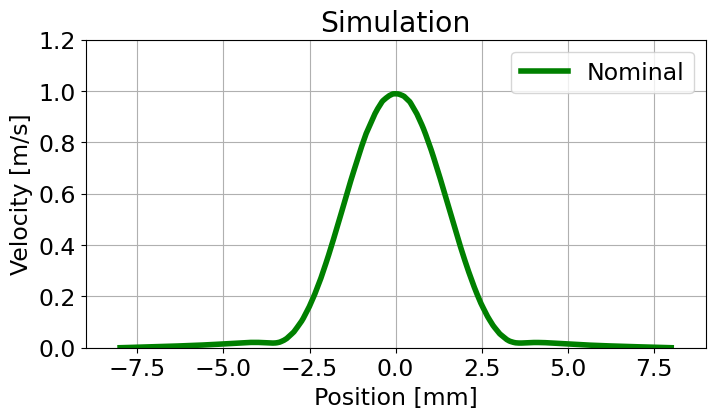

In [3]:
plt.figure(figsize=(8,4))
plt.xlabel('Position [mm]')
plt.ylabel('Velocity [m/s]')
plt.title('Simulation')
plt.plot((nominal[' Y [ m ]']-center)*1e3, nominal[' Velocity [ m s^-1 ]'],'-',color='green', label='Nominal',linewidth=4)
plt.axis([-9,9,0,1.2])
plt.legend()
plt.grid()
plt.savefig('figures/afSimNominal.png', dpi=300, bbox_inches='tight')

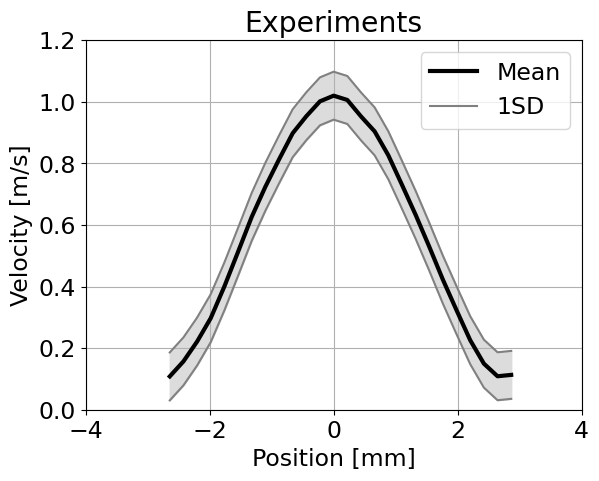

In [4]:
plt.figure(figsize=(6.4,4.8))
plt.xlabel('Position [mm]')
plt.ylabel('Velocity [m/s]')
plt.title('Experiments')
plt.plot(expS2['x (mm)']-5.39655,avgexp, '-k', linewidth=3, label='Mean')
plt.plot(expS2['x (mm)']-5.39655, plus,linestyle='-',color="gray", label='1SD')
plt.plot(expS2['x (mm)']-5.39655, minus,linestyle='-',color="gray")
plt.fill_between(expS2['x (mm)']-5.39655,plus, minus, color="gainsboro")
plt.axis([-4.0,4.0,0,1.2])
plt.legend()
plt.grid()
plt.savefig('figures/afExpSampling.png', dpi=300, bbox_inches='tight')

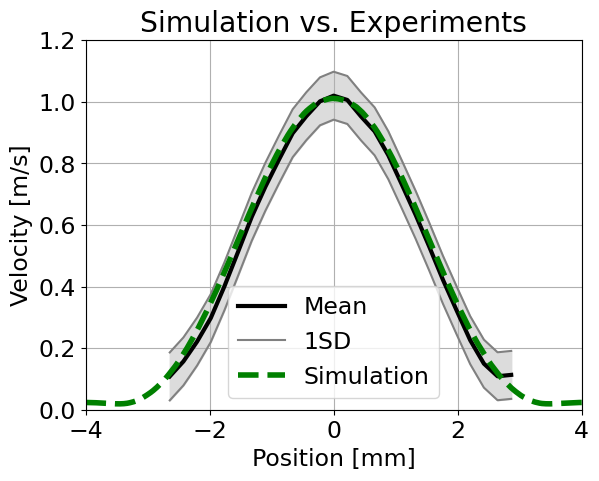

In [5]:
plt.figure(figsize=(6.4,4.8))
plt.xlabel('Position [mm]')
plt.ylabel('Velocity [m/s]')
plt.title('Simulation vs. Experiments')
plt.plot(expS2['x (mm)']-5.39655,avgexp, '-k', linewidth=3, label='Mean')
plt.plot(expS2['x (mm)']-5.39655, plus,linestyle='-',color="gray", label='1SD')
plt.plot(expS2['x (mm)']-5.39655, minus,linestyle='-',color="gray")
plt.fill_between(expS2['x (mm)']-5.39655,plus, minus, color="gainsboro")
plt.plot((sim1[' Y [ m ]']-center1)*1e3, avgsim,'--',color='green', label='Simulation',linewidth=4)
plt.axis([-4.0,4.0,0,1.2])
plt.legend()
plt.grid()
plt.savefig('figures/afExpSim.png', dpi=300, bbox_inches='tight')

## Results - Quantitative Deterministic Comparison

In [30]:
avgsim_a = np.array(avgsim)
index = np.where(avgsim_a > 0.1)[0][0]
start = index
end   = len(avgsim)-index
avgsim[end]

0.10040556643333333

In [33]:
np.max(sdexp)

0.13481842363143914

In [7]:
# SRQ: Average Velocity at 1mm above the mouthpiece along the diameter. 
sim_avg = np.average(avgsim[start:end])
exp_avg = np.average(avgexp)
# SRQ: Maximum Velocity at 1mm above the mouthpiece along the diameter. 
sim_max = np.max(avgsim)
exp_max = np.max(avgexp)
# Validation Metrics
metric_max = np.abs(sim_max - exp_max)
metric_avg = np.abs(sim_avg - exp_avg)

In [8]:
exp_max

1.0196214886666668

In [9]:
print('SRQ: Average difference at 1mm above the mouthpiece =',metric_avg)
print('SRQ: Max difference at 1mm above the mouthpiece =',metric_max)

SRQ: Average difference at 1mm above the mouthpiece = 0.04649622003745435
SRQ: Max difference at 1mm above the mouthpiece = 0.00892730273333342


From this analysis we can see that the difference in maximums provides the best agreement which is evident in the qualitative comparison as well. But they are showing similar differences in the SRQ although the average SRQ is of the order $4e^{-2}$ and the max SRQ is of the order $8e^{-3}$. 

In [10]:
metric_max_percent = np.abs(sim_max - exp_max)/ ((sim_max + exp_max)/2)
metric_max_percent*100

0.8794004641758203

In [11]:
((sim_max + exp_max)/2)

1.0151578373

In [12]:
metric__percent = np.abs(sim_avg - exp_avg)/ ((sim_avg + exp_avg)/2)
metric__percent*100

7.9227248011938975

In [13]:
np.abs(sim_avg - exp_avg)

0.04649622003745435

In [26]:
simSamplesMeans = [avgsim[start:end]]
expSamplesMeans = [avgexp]
valMetricMAX_percentDiff, valMetricMEAN_percentDiff  = [],[]
maxDiff,meanDiff,maxrmse, meanrmse = [] , [] , [] , [] 
def deterValidMetric(sim,exp):
    for x,y in zip(sim,exp):
        maxDIFF  = np.max(x)- np.max(y) 
        meanDIFF = np.mean(x)- np.mean(y)
        maxDiff.append(maxDIFF)
        meanDiff.append(meanDIFF)
        maxRMSE  = np.sqrt((maxDIFF**2)/2)
        meanRMSE = np.sqrt((meanDIFF**2)/2) 
        maxrmse.append(maxRMSE )
        meanrmse.append(meanRMSE)
        percentDiffMax  = (np.abs(maxDIFF )/np.abs((np.max(x) +np.max(y) /2)))*100
        percentDiffMean = (np.abs(meanDIFF)/np.abs((np.mean(x)+np.mean(y)/2)))*100
        valMetricMAX_percentDiff.append(percentDiffMax)
        valMetricMEAN_percentDiff.append(percentDiffMean)
    return

In [27]:
deterValidMetric(simSamplesMeans,expSamplesMeans)

In [29]:
print('valMetricMAX_percentDiff', valMetricMAX_percentDiff[0])
print('valMetricMEAN_percentDiff',valMetricMEAN_percentDiff[0])
print('maxDiff',maxDiff[0])
print('meanDiff',meanDiff[0])
print('maxrmse', maxrmse[0])
print('meanrmse',meanrmse[0])

valMetricMAX_percentDiff 0.5871275097916154
valMetricMEAN_percentDiff 5.212981504374477
maxDiff -0.00892730273333342
meanDiff 0.04649622003745435
maxrmse 0.006312556300445262
meanrmse 0.032877792488025796
